# A Sloppy Approach to Circuit Analysis

```{include} includes/latex_imports.md
```

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


<center>
<i>Sometimes a desperate man does dumb things.</i>

<b>Angus MacGyver</b>

</center>

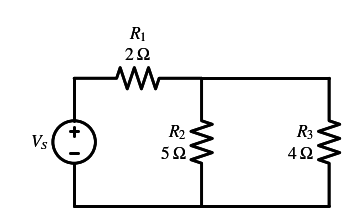

In [2]:

with schemdraw.Drawing(file='sloppy-1.svg') as d:
    d += elm.SourceV().label('$V_S$')
    d += elm.Resistor().right().label('$R_1$\n$2~\Omega$')
    d.push()
    d += elm.Resistor().down().label('$R_2$\n$5~\Omega$')
    d.pop()
    d += elm.Line().right()
    d += elm.Resistor().down().label('$R_3$\n$4~\Omega$')
    d += elm.Line().left().length(6)

`````{admonition} Example

Find $V_S$ if $P_{R_2}=20~W$.

```{figure} sloppy-1.svg
---
height: 300px
name: sloppy-1
---
```

````{admonition} Solution
:class: tip, dropdown
$P_{R_2}$ and $R_2$ tells you what $V_{R_2}$ is from

$$
P_{R_2} = (V_{R_2})^2/R_2
$$

That tells us what $I_{R_2}$ and $I_{R_3}$ are, which tells us what $I_{R_1}$ is.

$I_{R_1}$ and $R_1$ tells us $V_{R_1}$, and KVL then tells us what $V_S$ is.

````

`````

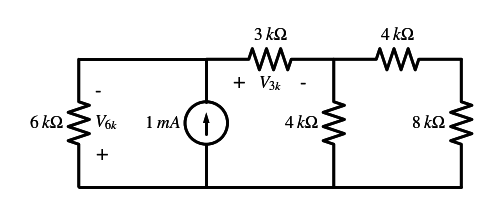

In [3]:
with schemdraw.Drawing(file='sloppy-2.svg') as d:
    d += elm.Resistor().up().label('$6~k\Omega$').label(['+','$V_{6k}$','-'], loc='bot')
    d += elm.Line().right()
    d.push()
    d += elm.SourceI().label('$1~mA$').down().reverse()
    d.pop()
    d += elm.Resistor().right().label('$3~k\Omega$').label(['+','$V_{3k}$','-'], loc='bot')
    d.push()
    d += elm.Resistor().down().label('$4~k\Omega$')
    d.pop()
    d += elm.Resistor().right().label('$4~k\Omega$')
    d += elm.Resistor().down().label('$8~k\Omega$')
    d += elm.Line().left().length(9)

`````{admonition} Example

Find $V_\text{6k}$ and $V_\text{3k}$.
```{figure} sloppy-2.svg
---
height: 300px
name: sloppy-2
---
```

````{admonition} Solution
:class: tip, dropdown
First, find the equivalent resistance of all the resistors, $R_{eq}$.

With the $1 mA$ current supply, that tells us $V_\text{6k}$.

$V_\text{3k}$ may then be found using $V_\text{6k}$ and the voltage divider equation using the equivalent resistance of the two $4~k\Omega$ resistors and the $8~k\Omega$ resistor.

````

`````

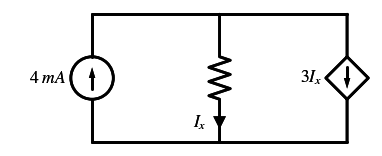

In [4]:
with schemdraw.Drawing(file='sloppy-3.svg') as d:
    d += elm.SourceI().label('$4~mA$').up()
    d += elm.Line().right()
    d.push()
    d += (R1 := elm.Resistor().down())
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R1.end).label('$I_x$')
    d.pop()
    d += elm.Line().right()
    d += elm.SourceControlledI().down().label('$3I_x$')
    d += elm.Line().left().length(6)

`````{admonition} Example

Find $I_x$.

```{figure} sloppy-3.svg
---
height: 300px
name: sloppy-3
---
```

````{admonition} Solution
:class: tip, dropdown
The current flowing into the top node is $4~mA$.  The current flowing out of the top node is $4 I_x$.

Using KCL, we can then find $I_x$.
````

`````

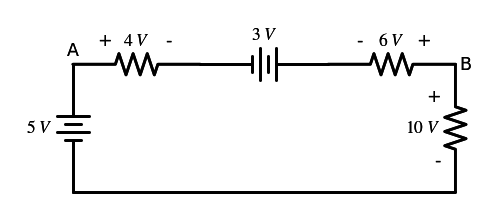

In [5]:
with schemdraw.Drawing(file='sloppy-4.svg') as d:
    d += elm.Battery().up().label('$5~V$').label('A', loc='right').reverse()
    d += elm.Resistor().right().label(['+', '$4~V$', '-'])
    d += elm.Battery().right().label('$3~V$').reverse()
    d += elm.Resistor().right().label(['-', '$6~V$', '+']).label('B', loc='right')
    d += elm.Resistor().down().label(['+', '$10~V$', '-'])
    d += elm.Line().left().length(9)

`````{admonition} Example

Find $V_{AB}$.

```{figure} sloppy-4.svg
---
height: 300px
name: sloppy-4
---
```

````{admonition} Solution
:class: tip, dropdown
Assuming the current flow is counter-clockwise, the voltage at $A$ with respect to $B$ is

$$
+6 +3 -4 = 5V
$$
````

`````